In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
df = pd.read_csv("/content/BNB-USD.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,10.356931,11.607489,10.325634,11.393217,11.393217,117838677
1,2019-03-02,11.384693,11.915753,10.960816,11.869744,11.869744,120807894
2,2019-03-03,11.845305,11.964979,11.352064,11.537903,11.537903,89868246
3,2019-03-04,11.538013,11.599405,11.070543,11.545945,11.545945,89421231
4,2019-03-05,11.520388,13.841443,11.520388,13.811967,13.811967,237026335
...,...,...,...,...,...,...,...
1823,2024-02-26,388.535004,404.440094,382.256866,401.643890,401.643890,2011146388
1824,2024-02-27,401.643890,403.740051,390.917877,394.995636,394.995636,1750697179
1825,2024-02-28,394.951721,427.046814,394.661072,415.771606,415.771606,2323818531
1826,2024-02-29,415.583618,419.779022,392.379883,399.778717,399.778717,2058367303


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0        11.393217
1        11.869744
2        11.537903
3        11.545945
4        13.811967
           ...    
1823    401.643890
1824    394.995636
1825    415.771606
1826    399.778717
1827    407.810760
Name: Close, Length: 1828, dtype: float64

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [8]:
train_data.shape

(1279, 1)

In [9]:
test_data.shape

(549, 1)

In [10]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
19/19 [==============================] - 2s 33ms/step - loss: 0.0297
Epoch 2/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0024
Epoch 3/100
19/19 [==============================] - 1s 32ms/step - loss: 0.0019
Epoch 4/100
19/19 [==============================] - 1s 33ms/step - loss: 0.0018
Epoch 5/100
19/19 [==============================] - 1s 36ms/step - loss: 0.0016
Epoch 6/100
19/19 [==============================] - 1s 26ms/step - loss: 0.0016
Epoch 7/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0015
Epoch 8/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0015
Epoch 9/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0014
Epoch 10/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0013
Epoch 11/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0012
Epoch 12/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0012
Epoch 13/100
19/19 [=====

In [15]:
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

14/14 [==============================] - 0s 7ms/step


In [16]:
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [17]:
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
test_mse = np.mean((np.array(ytest) - np.array(y_pred))**2)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MSE:', test_mse)

Testing RMSE: 275.263687948397
Testing MAPE: 70399.49700572039
Testing MSE: 75770.09790295246


In [18]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.33675585 0.33545785 0.33776761 0.3341765  0.32723409 0.3306432
 0.32711594 0.3276278  0.32892126 0.33005469 0.32824974 0.3360497
 0.33299709 0.33024014 0.33557263 0.34448539 0.34276336 0.34571182
 0.35574894 0.36786681 0.36475761 0.36643537 0.35346403 0.35264237
 0.34507417 0.34813608 0.36507858 0.37629004 0.39300811 0.39320309
 0.3932248  0.38320847 0.38674482 0.43270004 0.47169776 0.47158018
 0.45699175 0.46192565 0.45482597 0.4577865  0.45432788 0.46116786
 0.4715817  0.46235201 0.44786031 0.4405003  0.44291643 0.43762707
 0.44381158 0.44922158 0.431105   0.43950489 0.43473831 0.46252757
 0.45901412 0.44979772 0.45611245 0.45762464 0.46161676 0.46365535
 0.44432213 0.43376663 0.42579351 0.42403432 0.43964101 0.44490418
 0.44362965 0.452233   0.4473624  0.436689   0.4364261  0.43789551
 0.43576697 0.44326727 0.43744386 0.44022957 0.44762031 0.46448559
 0.47194532 0.47088212 0.46736066 0.47810221 0.47348508 0.48755948
 0.51827373 0.52754821 0.51556818 0.51072327 0.51391

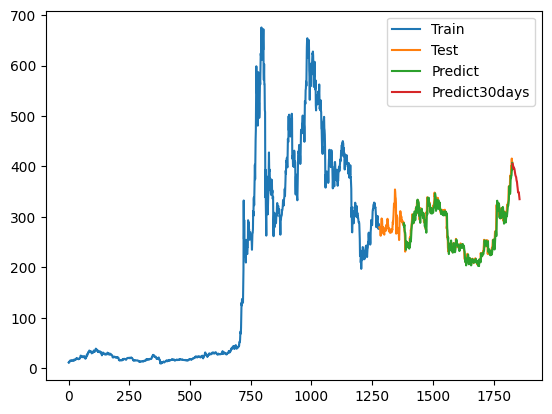

In [19]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [20]:
x_input.shape

(1, 100, 1)

In [21]:
train_size_82 = int(0.8 * len(df1))
test_size_82 = len(df1) - train_size_82
train_data_82 = df1[:train_size_82]
test_data_82 = df1[train_size_82:train_size_82+test_size_82]

In [22]:
X_train_82, y_train_82 = create_dataset(train_data_82, time_step)
X_test_82, ytest_82 = create_dataset(test_data_82, time_step)

In [23]:
X_train_82 =X_train_82.reshape(X_train_82.shape[0],X_train_82.shape[1] , 1)
X_test_82 = X_test_82.reshape(X_test_82.shape[0],X_test_82.shape[1] , 1)

In [24]:
model.fit(X_train_82,y_train_82,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 0s 19ms/step - loss: 4.6644e-04
Epoch 2/100
22/22 [==============================] - 0s 20ms/step - loss: 4.6255e-04
Epoch 3/100
22/22 [==============================] - 0s 19ms/step - loss: 4.6668e-04
Epoch 4/100
22/22 [==============================] - 0s 20ms/step - loss: 4.5895e-04
Epoch 5/100
22/22 [==============================] - 0s 19ms/step - loss: 4.9390e-04
Epoch 6/100
22/22 [==============================] - 0s 20ms/step - loss: 4.9132e-04
Epoch 7/100
22/22 [==============================] - 0s 20ms/step - loss: 4.7741e-04
Epoch 8/100
22/22 [==============================] - 0s 18ms/step - loss: 4.8627e-04
Epoch 9/100
22/22 [==============================] - 0s 20ms/step - loss: 5.0711e-04
Epoch 10/100
22/22 [==============================] - 1s 32ms/step - loss: 4.7939e-04
Epoch 11/100
22/22 [==============================] - 1s 34ms/step - loss: 4.7671e-04
Epoch 12/100
22/22 [==============================] - 1s 33ms/s

In [25]:
train_predict_82=model.predict(X_train_82)
y_pred_82=model.predict(X_test_82)

9/9 [==============================] - 0s 8ms/step


In [26]:
train_predict_82=scaler.inverse_transform(train_predict_82)
y_pred_82=scaler.inverse_transform(y_pred_82)

In [27]:
test_82_rmse = np.sqrt(np.mean((y_pred_82 - ytest_82)**2))
test_82_mape = np.mean(np.abs((ytest_82 - y_pred_82) / ytest_82)) * 100
test_82_mse = np.mean((np.array(ytest_82) - np.array(y_pred_82))**2)
print('Testing RMSE:', test_82_rmse)
print('Testing MAPE:', test_82_mape)
print('Testing MSE:', test_82_mse)

Testing RMSE: 260.5188175061242
Testing MAPE: 71670.3761592578
Testing MSE: 67870.05427478925


In [28]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data_82[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.33675585 0.33545785 0.33776761 0.3341765  0.32723409 0.3306432
 0.32711594 0.3276278  0.32892126 0.33005469 0.32824974 0.3360497
 0.33299709 0.33024014 0.33557263 0.34448539 0.34276336 0.34571182
 0.35574894 0.36786681 0.36475761 0.36643537 0.35346403 0.35264237
 0.34507417 0.34813608 0.36507858 0.37629004 0.39300811 0.39320309
 0.3932248  0.38320847 0.38674482 0.43270004 0.47169776 0.47158018
 0.45699175 0.46192565 0.45482597 0.4577865  0.45432788 0.46116786
 0.4715817  0.46235201 0.44786031 0.4405003  0.44291643 0.43762707
 0.44381158 0.44922158 0.431105   0.43950489 0.43473831 0.46252757
 0.45901412 0.44979772 0.45611245 0.45762464 0.46161676 0.46365535
 0.44432213 0.43376663 0.42579351 0.42403432 0.43964101 0.44490418
 0.44362965 0.452233   0.4473624  0.436689   0.4364261  0.43789551
 0.43576697 0.44326727 0.43744386 0.44022957 0.44762031 0.46448559
 0.47194532 0.47088212 0.46736066 0.47810221 0.47348508 0.48755948
 0.51827373 0.52754821 0.51556818 0.51072327 0.51391

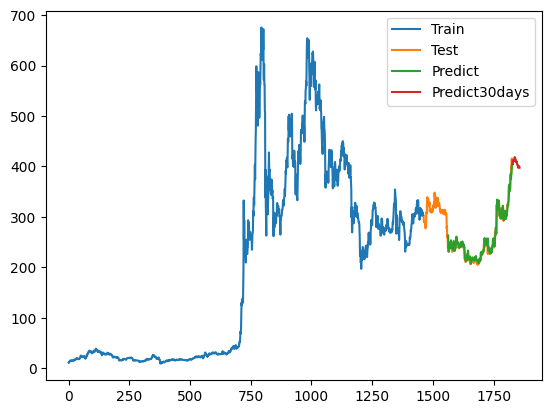

In [29]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_82, step=1)
plt.plot(scaler.inverse_transform(train_data_82))
test_data_index = pd.RangeIndex(start=train_size_82, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_82))
test_data_index = pd.RangeIndex(start=train_size_82+101, stop=train_size_82+test_size_82, step=1)
plt.plot(test_data_index,(y_pred_82))
prediect_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [30]:
train_size_91 = int(0.9 * len(df1))
test_size_91 = len(df1) - train_size_91
train_data_91 = df1[:train_size_91]
test_data_91 = df1[train_size_91:train_size_91+test_size_91]

In [31]:
X_train_91, y_train_91 = create_dataset(train_data_91, time_step)
X_test_91, ytest_91 = create_dataset(test_data_91, time_step)

In [32]:
X_train_91 =X_train_91.reshape(X_train_91.shape[0],X_train_91.shape[1] , 1)
X_test_91 = X_test_91.reshape(X_test_91.shape[0],X_test_91.shape[1] , 1)

In [33]:
model.fit(X_train_91,y_train_91,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 20ms/step - loss: 3.9822e-04
Epoch 2/100
25/25 [==============================] - 1s 20ms/step - loss: 4.4253e-04
Epoch 3/100
25/25 [==============================] - 1s 20ms/step - loss: 3.9423e-04
Epoch 4/100
25/25 [==============================] - 1s 20ms/step - loss: 3.9887e-04
Epoch 5/100
25/25 [==============================] - 0s 19ms/step - loss: 6.3264e-04
Epoch 6/100
25/25 [==============================] - 0s 19ms/step - loss: 4.3999e-04
Epoch 7/100
25/25 [==============================] - 0s 20ms/step - loss: 4.4444e-04
Epoch 8/100
25/25 [==============================] - 1s 20ms/step - loss: 4.2210e-04
Epoch 9/100
25/25 [==============================] - 1s 20ms/step - loss: 4.0210e-04
Epoch 10/100
25/25 [==============================] - 1s 20ms/step - loss: 4.0284e-04
Epoch 11/100
25/25 [==============================] - 0s 18ms/step - loss: 4.0102e-04
Epoch 12/100
25/25 [==============================] - 0s 19ms/s

In [34]:
train_predict_91=model.predict(X_train_91)
y_pred_91=model.predict(X_test_91)

3/3 [==============================] - 0s 8ms/step


In [35]:
train_predict_91=scaler.inverse_transform(train_predict_91)
y_pred_91=scaler.inverse_transform(y_pred_91)

In [36]:
test_91_rmse = np.sqrt(np.mean((y_pred_91 - ytest_91)**2))
test_91_mape = np.mean(np.abs((ytest_91 - y_pred_91) / ytest_91)) * 100
test_91_mse = np.mean((np.array(ytest_91) - np.array(y_pred_91))**2)
print('Testing RMSE:', test_91_rmse)
print('Testing MAPE:', test_91_mape)
print('Testing MSE:', test_91_mse)

Testing RMSE: 312.4489428610681
Testing MAPE: 69533.93376484021
Testing MSE: 97624.341894999


In [37]:
x_input=test_data_91[-101:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.33675585 0.33545785 0.33776761 0.3341765  0.32723409 0.3306432
 0.32711594 0.3276278  0.32892126 0.33005469 0.32824974 0.3360497
 0.33299709 0.33024014 0.33557263 0.34448539 0.34276336 0.34571182
 0.35574894 0.36786681 0.36475761 0.36643537 0.35346403 0.35264237
 0.34507417 0.34813608 0.36507858 0.37629004 0.39300811 0.39320309
 0.3932248  0.38320847 0.38674482 0.43270004 0.47169776 0.47158018
 0.45699175 0.46192565 0.45482597 0.4577865  0.45432788 0.46116786
 0.4715817  0.46235201 0.44786031 0.4405003  0.44291643 0.43762707
 0.44381158 0.44922158 0.431105   0.43950489 0.43473831 0.46252757
 0.45901412 0.44979772 0.45611245 0.45762464 0.46161676 0.46365535
 0.44432213 0.43376663 0.42579351 0.42403432 0.43964101 0.44490418
 0.44362965 0.452233   0.4473624  0.436689   0.4364261  0.43789551
 0.43576697 0.44326727 0.43744386 0.44022957 0.44762031 0.46448559
 0.47194532 0.47088212 0.46736066 0.47810221 0.47348508 0.48755948
 0.51827373 0.52754821 0.51556818 0.51072327 0.51391

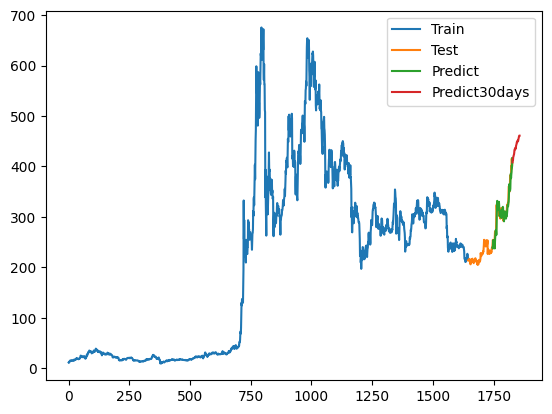

In [38]:
train_data_index = pd.RangeIndex(start=0, stop=train_size_91, step=1)
plt.plot(scaler.inverse_transform(train_data_91))
test_data_index = pd.RangeIndex(start=train_size_91, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_91))
test_data_index = pd.RangeIndex(start=train_size_91+101, stop=train_size_91+test_size_91, step=1)
plt.plot(test_data_index,(y_pred_91))
predict_data_index = pd.RangeIndex(start=len(df1), stop=len(df1)+30, step=1)
plt.plot(predict_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()